In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
df=pd.read_csv("/content/archive (2).zip")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.iloc[66]

,66
sepal_length,5.6
sepal_width,3.0
petal_length,4.5
petal_width,1.5
species,Iris-versicolor


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
df.iloc[:,1]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


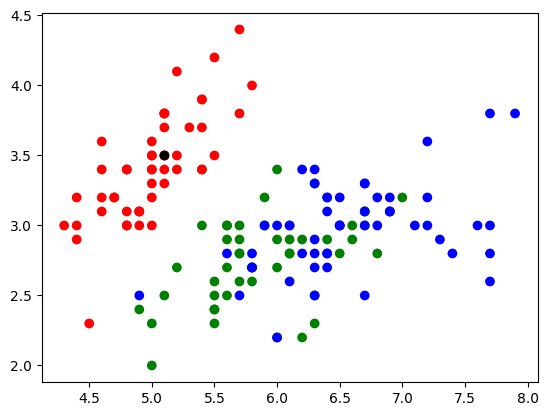

The flower is of Iris-setosa species


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def knn(df,a,b,c,d,k):
    df=pd.DataFrame(df)
  #euclidian distances
    dist=[]
    for i in range(len(df)):
        dist.append(np.sqrt((((a - df.iloc[i,0]))**2)+(((b - df.iloc[i,1]))**2)+(((c - df.iloc[i,2]))**2)+(((d - df.iloc[i,3]))**2)))
    df["dist"]=dist
    df=df.sort_values(by="dist")
    plt.scatter(x=df.iloc[:,0],y=df.iloc[:,1], c=df.iloc[:, -2].apply(lambda x: {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}[x]))
    plt.scatter(x=a,y=b,color="black")
    plt.show()
    l=[]
    for i in range(k):
        l.append(df.iloc[i,-2])
    c1=l.count("Iris-setosa")
    c2=l.count("Iris-versicolor")
    c3=l.count("Iris-virginica")

#     for i in range(k):
#         print(i)
#         if(df.iloc[i,-1] == "Iris-setosa"):
#             c1+=1
#         elif(df.iloc[i,-1] == "Iris-versicolor"):
#             c2+=1
#         else:
#             c3+=1
#     print('values=', c1,c2,c3)
    if(c1>c2 and c1>c3):
        return 1
    elif(c2>c3):
        return 2
    else:
        return 3


import pandas as pd
import matplotlib.pyplot as plt

a,b=5.1,3.5
c,d=1.4,0.2
k=7

res=knn(df,a,b,c,d,k)
if(res == 1):
    print("The flower is of Iris-setosa species")
elif(res == 2):
    print("The flower is of Iris-versicolor species")
else:
    print("The flower is of Iris-virginica species")